## WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

## Perform API Calls

In [3]:
# Using the Open Weather API gather information about the weather of the cities
loc = []
lat = []
lng = []
max_temp = []
hum = []
cloud = []
wind = []
country = []
date = []

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

record = 0
sets = 1


print("Beginning Data Retrival")
print( "-" * 29)

time.sleep(1)
for place in cities:
    
    query_url = f"{url}appid={weather_api_key}&q={place}&units={units}"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    try:
        loc.append(weather_json["name"])
        lat.append(weather_json["coord"]["lat"])
        lng.append(weather_json["coord"]["lon"])
        max_temp.append(weather_json["main"]["temp_max"])
        hum.append(weather_json["main"]["humidity"])
        cloud.append(weather_json["clouds"]["all"])
        wind.append(weather_json["wind"]["speed"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])
        
        
        if record < 49:
            record += 1
        
        else:
            record = 0
            sets += 1
        
        print(f"Processing Record of {record} of Set {sets} | {place}")
    except:
        print(f"City not found. Skipping ... ")

Beginning Data Retrival
-----------------------------
Processing Record of 1 of Set 1 | zheleznodorozhnyy
Processing Record of 2 of Set 1 | sao joao da barra
Processing Record of 3 of Set 1 | hilo
Processing Record of 4 of Set 1 | rikitea
Processing Record of 5 of Set 1 | ponta do sol
City not found. Skipping ... 
City not found. Skipping ... 
Processing Record of 6 of Set 1 | qaanaaq
City not found. Skipping ... 
City not found. Skipping ... 
Processing Record of 7 of Set 1 | barrow
Processing Record of 8 of Set 1 | parana
Processing Record of 9 of Set 1 | alofi
Processing Record of 10 of Set 1 | busselton
Processing Record of 11 of Set 1 | ushuaia
Processing Record of 12 of Set 1 | kerchevskiy
Processing Record of 13 of Set 1 | launceston
Processing Record of 14 of Set 1 | hermanus
City not found. Skipping ... 
Processing Record of 15 of Set 1 | cherskiy
Processing Record of 16 of Set 1 | florianopolis
Processing Record of 17 of Set 1 | hofn
Processing Record of 18 of Set 1 | kieta
P

Processing Record of 21 of Set 4 | adrar
Processing Record of 22 of Set 4 | scottsbluff
Processing Record of 23 of Set 4 | torbay
Processing Record of 24 of Set 4 | cap malheureux
Processing Record of 25 of Set 4 | diamantina
Processing Record of 26 of Set 4 | arraial do cabo
Processing Record of 27 of Set 4 | faanui
Processing Record of 28 of Set 4 | ternate
Processing Record of 29 of Set 4 | dakar
Processing Record of 30 of Set 4 | mount gambier
Processing Record of 31 of Set 4 | ancud
Processing Record of 32 of Set 4 | progreso
Processing Record of 33 of Set 4 | tasiilaq
Processing Record of 34 of Set 4 | kologriv
Processing Record of 35 of Set 4 | san patricio
Processing Record of 36 of Set 4 | bluff
Processing Record of 37 of Set 4 | santo antonio do sudoeste
Processing Record of 38 of Set 4 | luderitz
Processing Record of 39 of Set 4 | ouadda
Processing Record of 40 of Set 4 | owando
Processing Record of 41 of Set 4 | pedasi
Processing Record of 42 of Set 4 | lebu
Processing Reco

Processing Record of 46 of Set 7 | nishihara
Processing Record of 47 of Set 7 | altay
Processing Record of 48 of Set 7 | fort nelson
Processing Record of 49 of Set 7 | milove
Processing Record of 0 of Set 8 | komsomolskiy
Processing Record of 1 of Set 8 | ballinrobe
Processing Record of 2 of Set 8 | qarayeri
Processing Record of 3 of Set 8 | karratha
Processing Record of 4 of Set 8 | arlit
Processing Record of 5 of Set 8 | artvin
Processing Record of 6 of Set 8 | selikhino
Processing Record of 7 of Set 8 | mayskiy
Processing Record of 8 of Set 8 | yarmouth
Processing Record of 9 of Set 8 | jaisinghnagar
Processing Record of 10 of Set 8 | gat
Processing Record of 11 of Set 8 | longyearbyen
Processing Record of 12 of Set 8 | chernushka
Processing Record of 13 of Set 8 | cortez
City not found. Skipping ... 
Processing Record of 14 of Set 8 | tiarei
Processing Record of 15 of Set 8 | nova olimpia
Processing Record of 16 of Set 8 | honningsvag
Processing Record of 17 of Set 8 | riberalta
Pr

Processing Record of 18 of Set 11 | shabo
Processing Record of 19 of Set 11 | kharan
Processing Record of 20 of Set 11 | little current
Processing Record of 21 of Set 11 | hanna
Processing Record of 22 of Set 11 | togur
Processing Record of 23 of Set 11 | funtua
Processing Record of 24 of Set 11 | ugoofaaru
Processing Record of 25 of Set 11 | olutanga
Processing Record of 26 of Set 11 | caidian
Processing Record of 27 of Set 11 | moose factory
Processing Record of 28 of Set 11 | kapoeta
Processing Record of 29 of Set 11 | morehead
Processing Record of 30 of Set 11 | playas
Processing Record of 31 of Set 11 | almeirim
Processing Record of 32 of Set 11 | haines junction
Processing Record of 33 of Set 11 | rafraf
Processing Record of 34 of Set 11 | ust-nera
City not found. Skipping ... 
Processing Record of 35 of Set 11 | takestan
Processing Record of 36 of Set 11 | auki
Processing Record of 37 of Set 11 | vardo
Processing Record of 38 of Set 11 | fare
Processing Record of 39 of Set 11 | 

In [4]:
# Create a DataFrame for the random cities
weather_dict = {'City': loc,
                'Lat': lat,
                'Lng': lng,
                'Max Temp': max_temp,
                'Humidity': hum,
                'Cloudiness': cloud,
                'Wind Speed': wind,
                'Country': country,
                'Date': date}

city_Weather = pd.DataFrame.from_dict(weather_dict, orient = "index")
city_Weather = city_Weather.transpose()
city_Weather

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Zheleznodorozhnyy,55.7503,38.0042,6.8,78,90,15.66,RU,1613178286
1,São João da Barra,-21.6403,-41.0511,77.41,82,100,14.63,BR,1613178287
2,Hilo,19.7297,-155.09,82.4,51,20,5.75,US,1613178287
3,Rikitea,-23.1203,-134.969,80.53,72,26,10.11,PF,1613178287
4,Ponta do Sol,32.6667,-17.1,57,74,0,5.01,PT,1613178287
...,...,...,...,...,...,...,...,...,...
553,Kenora,49.8167,-94.4337,-18,52,75,2.3,CA,1613178127
554,Praia,14.9215,-23.5087,69.8,73,0,19.57,CV,1613178389
555,Tessalit,20.1986,1.0114,69.26,19,0,11.39,ML,1613178389
556,Port Shepstone,-30.7414,30.455,75.61,82,0,12.71,ZA,1613178218


In [27]:
# Cleaning the data frame to only have humidity less than or equal to 100%
city_Weather["Humidity"].max()

city_Weather = city_Weather.loc[city_Weather["Humidity"] <= 100, :]

## Convert Raw Data to DataFrame

In [6]:
# Export the city weather dat to a csv
city_Weather.to_csv(output_data_file)

# View the dataframe
city_Weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Zheleznodorozhnyy,55.7503,38.0042,6.8,78,90,15.66,RU,1613178286
1,São João da Barra,-21.6403,-41.0511,77.41,82,100,14.63,BR,1613178287
2,Hilo,19.7297,-155.09,82.4,51,20,5.75,US,1613178287
3,Rikitea,-23.1203,-134.969,80.53,72,26,10.11,PF,1613178287
4,Ponta do Sol,32.6667,-17.1,57,74,0,5.01,PT,1613178287


## Plotting the Data

### Temperature vs. Latitude

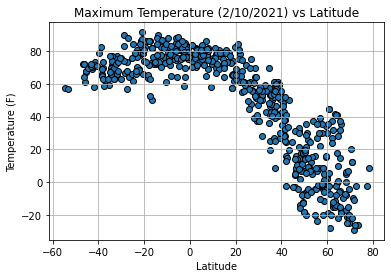

In [7]:
# Scatter plot of temp vs latitude of the cities

plt.scatter(lat,max_temp, marker = "o", edgecolor = "black")

plt.title("Maximum Temperature (2/12/2021) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)

plt.show()

This scatter plot displays the relationship between
a city's maximum temperature and a city's latitude in February. 
This displays how the city's latitude, distance from the equator, affects
a city's maximum temperature.

### Humidity vs. Latitude

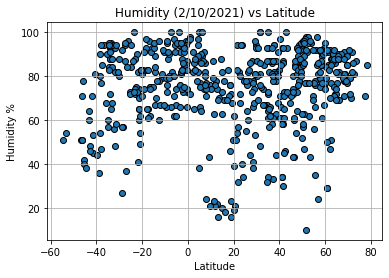

In [8]:
# Scatter plot of humidity vs latitude of the cities

plt.scatter(lat,hum, marker = "o", edgecolor = "black")

plt.title("Humidity (2/12/2021) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid(True)
plt.show()

This scatter plot displays the relationship between a city's 
humidity and a city's latitude in February. 
This displays how the city's latitude, distance from the equator, 
affects a city's humidity.

### Cloudiness vs. Latitude

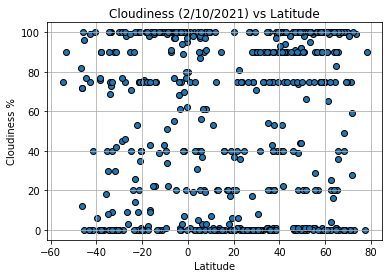

In [9]:
# Scatter plot of cloudiness vs latitude of the cities

plt.scatter(lat,cloud, marker = "o", edgecolor = "black")

plt.title("Cloudiness (2/12/2021) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid(True)
plt.show()

This scatter plot displays the relationship between a city's cloudiness, sky coverage of clouds, and a city's latitude in February. This displays how the city's latitude, distance from the equator, affects a city's cloudiness.

### Wind Speed vs. Latitude

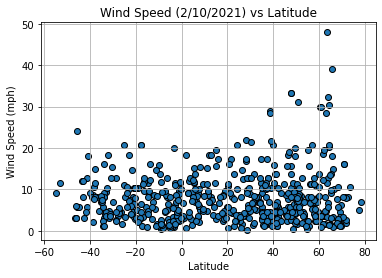

In [10]:
# Scatter plot of cloudiness vs latitude of the cities

plt.scatter(lat,wind, marker = "o", edgecolor = "black")

plt.title("Wind Speed (2/12/2021) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.show()

This scatter plot displays the relationship between a city's wind speed and a city's latitude in February. This displays how the city's latitude, distance from the equator, affects a city's wind speed.

## Linear Regression

In [12]:
# Splitting the data frame based on the northern and southern hemisphere
northern_hemisphere = city_Weather.loc[city_Weather["Lat"] >= 0, :]
southern_hemisphere = city_Weather.loc[city_Weather["Lat"] <= 0, :]

# Creating variables for graphs
n_lat = northern_hemisphere["Lat"].astype(float)
n_temp = northern_hemisphere["Max Temp"].astype(float)
n_hum = northern_hemisphere["Humidity"].astype(float)
n_cloud = northern_hemisphere["Cloudiness"].astype(float)
n_wind = northern_hemisphere["Wind Speed"].astype(float)

s_lat = southern_hemisphere["Lat"].astype(float)
s_temp = southern_hemisphere["Max Temp"].astype(float)
s_hum = southern_hemisphere["Humidity"].astype(float)
s_cloud = southern_hemisphere["Cloudiness"].astype(float)
s_wind = southern_hemisphere["Wind Speed"].astype(float)

#### Northern Hemisphere - Temperature vs. Latitude

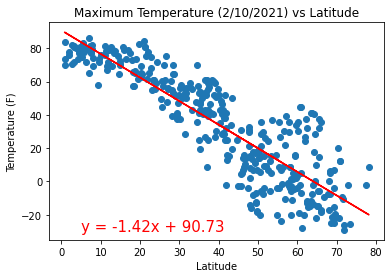

The r value is -0.8785801006084631
The r squared value is 0.7719029931851772


In [13]:
# Scatter plot of temperature vs latitude of the cities

plt.scatter(n_lat,n_temp, marker = "o")

plt.title("Maximum Temperature (2/12/2021) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

# Linear regression of N. Hemi Temperature vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_temp)

# creating linear regression line
regress_line = slope * n_lat + intercept

line_eq = f'y = {slope:.2f}x + {intercept:.2f}'

plt.plot(n_lat, regress_line, color = "red")
plt.annotate(line_eq, (5,-30), color = "red", fontsize = 15)
plt.show()

# printing r value and r squared values
print(f'The r value is {rvalue}')
print(f'The r squared value is {rvalue**2}')

#### Southern Hemisphere - Temperature vs. Latitude

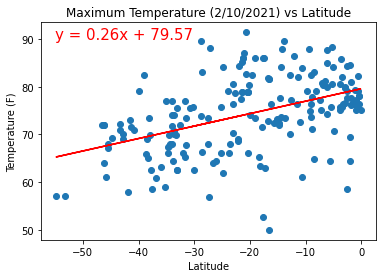

The r value is 0.4505310556051169
The r squared value is 0.20297823206466095


In [14]:
# Scatter plot of temperature vs latitude of the cities

plt.scatter(s_lat,s_temp, marker = "o")

plt.title("Maximum Temperature (2/12/2021) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

# Linear regression of S. Hemi Temperature vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_temp)

# creating linear regression line
regress_line = slope * s_lat + intercept

line_eq = f'y = {slope:.2f}x + {intercept:.2f}'

plt.plot(s_lat, regress_line, color = "red")
plt.annotate(line_eq, (-55,90), color = "red", fontsize = 15)
plt.show()

# printing r value and r squared values
print(f'The r value is {rvalue}')
print(f'The r squared value is {rvalue**2}')

#### Northern Hemisphere - Humidity vs. Latitude

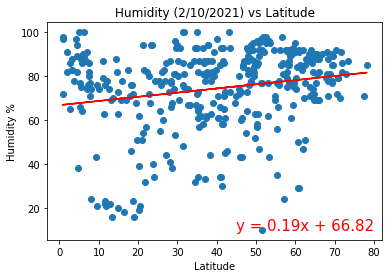

The r value is 0.19943723496783577
The r squared value is 0.039775210691615735


In [15]:
# Scatter plot of temperature vs latitude of the cities

plt.scatter(n_lat,n_hum, marker = "o")

plt.title("Humidity (2/12/2021) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")

# Linear regression of N. Hemi Humidity vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_hum)

# creating linear regression line
regress_line = slope * n_lat + intercept

line_eq = f'y = {slope:.2f}x + {intercept:.2f}'

plt.plot(n_lat, regress_line, color = "red")
plt.annotate(line_eq, (45,10), color = "red", fontsize = 15)
plt.show()

# printing r value and r squared values
print(f'The r value is {rvalue}')
print(f'The r squared value is {rvalue**2}')

#### Southern Hemisphere - Humidity vs. Latitude

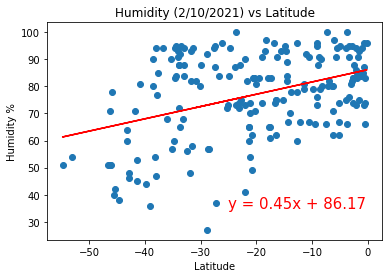

The r value is 0.4012983329929709
The r squared value is 0.16104035206293738


In [22]:
# Scatter plot of temperature vs latitude of the cities

plt.scatter(s_lat,s_hum, marker = "o")

plt.title("Humidity (2/12/2021) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")

# Linear regression of S. Hemi Humidity vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_hum)

# creating linear regression line
regress_line = slope * s_lat + intercept

line_eq = f'y = {slope:.2f}x + {intercept:.2f}'

plt.plot(s_lat, regress_line, color = "red")
plt.annotate(line_eq, (-25,35), color = "red", fontsize = 15)
plt.show()

# printing r value and r squared values
print(f'The r value is {rvalue}')
print(f'The r squared value is {rvalue**2}')

#### Northern Hemisphere - Cloudiness vs. Latitude

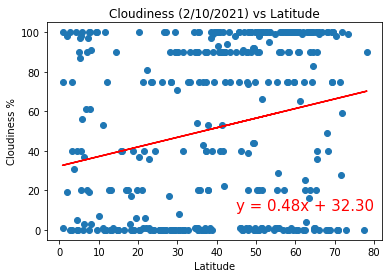

The r value is 0.2284792995406985
The r squared value is 0.052202790318608236


In [17]:
# Scatter plot of temperature vs latitude of the cities

plt.scatter(n_lat,n_cloud, marker = "o")

plt.title("Cloudiness (2/12/2021) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")

# Linear regression of N. Hemi Cloudiness vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_cloud)

# creating linear regression line
regress_line = slope * n_lat + intercept

line_eq = f'y = {slope:.2f}x + {intercept:.2f}'

plt.plot(n_lat, regress_line, color = "red")
plt.annotate(line_eq, (45,10), color = "red", fontsize = 15)
plt.show()

# printing r value and r squared values
print(f'The r value is {rvalue}')
print(f'The r squared value is {rvalue**2}')

#### Southern Hemisphere - Cloudiness vs. Latitude

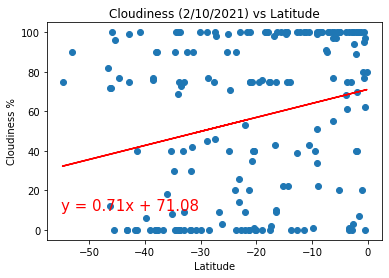

The r value is 0.24489615603001688
The r squared value is 0.05997412723827837


In [18]:
# Scatter plot of temperature vs latitude of the cities

plt.scatter(s_lat,s_cloud, marker = "o")

plt.title("Cloudiness (2/12/2021) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")

# Linear regression of S. Hemi Cloudiness vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_cloud)

# creating linear regression line
regress_line = slope * s_lat + intercept

line_eq = f'y = {slope:.2f}x + {intercept:.2f}'

plt.plot(s_lat, regress_line, color = "red")
plt.annotate(line_eq, (-55,10), color = "red", fontsize = 15)
plt.show()

# printing r value and r squared values
print(f'The r value is {rvalue}')
print(f'The r squared value is {rvalue**2}')

#### Northern Hemisphere - Wind Speed vs. Latitude

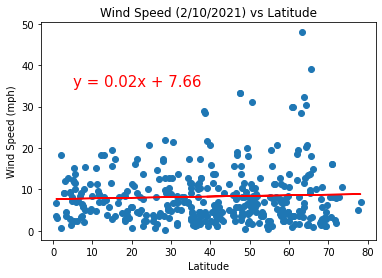

The r value is 0.044568108838564414
The r squared value is 0.0019863163254461233


In [19]:
# Scatter plot of temperature vs latitude of the cities

plt.scatter(n_lat,n_wind, marker = "o")

plt.title("Wind Speed (2/12/2021) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Linear regression of N. Hemi Wind Speed vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_wind)

# creating linear regression line
regress_line = slope * n_lat + intercept

line_eq = f'y = {slope:.2f}x + {intercept:.2f}'

plt.plot(n_lat, regress_line, color = "red")
plt.annotate(line_eq, (5,35), color = "red", fontsize = 15)
plt.show()

# printing r value and r squared values
print(f'The r value is {rvalue}')
print(f'The r squared value is {rvalue**2}')

#### Southern Hemisphere - Wind Speed vs. Latitude

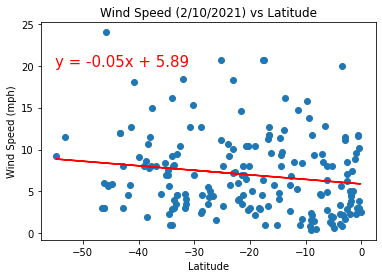

The r value is -0.16104918676381982
The r squared value is 0.02593684055728772


In [25]:
# Scatter plot of temperature vs latitude of the cities

plt.scatter(s_lat,s_wind, marker = "o")

plt.title("Wind Speed (2/12/2021) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Linear regression of S. Hemi Wind Speed vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_wind)

# creating linear regression line
regress_line = slope * s_lat + intercept

line_eq = f'y = {slope:.2f}x + {intercept:.2f}'

plt.plot(s_lat, regress_line, color = "red")
plt.annotate(line_eq, (-55,20), color = "red", fontsize = 15)
plt.show()

# printing r value and r squared values
print(f'The r value is {rvalue}')
print(f'The r squared value is {rvalue**2}')